In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [12]:
import os
print(os.getcwd())

c:\Users\danie\Machine_Learning_House_Prediction_Project\notebooks


In [13]:
import os
os.chdir('..')  # Move one level up to the parent directory
print(os.getcwd())  # Confirm the new working directory

c:\Users\danie\Machine_Learning_House_Prediction_Project


In [566]:
df = pd.read_csv('data/training_data/train.csv')
test_df = pd.read_csv('data/raw/test.csv')

In [567]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [569]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [570]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [571]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [572]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [573]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [574]:
df.dtypes[df.dtypes != 'object']

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### House Price Distribution

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Axes: xlabel='SalePrice', ylabel='Count'>

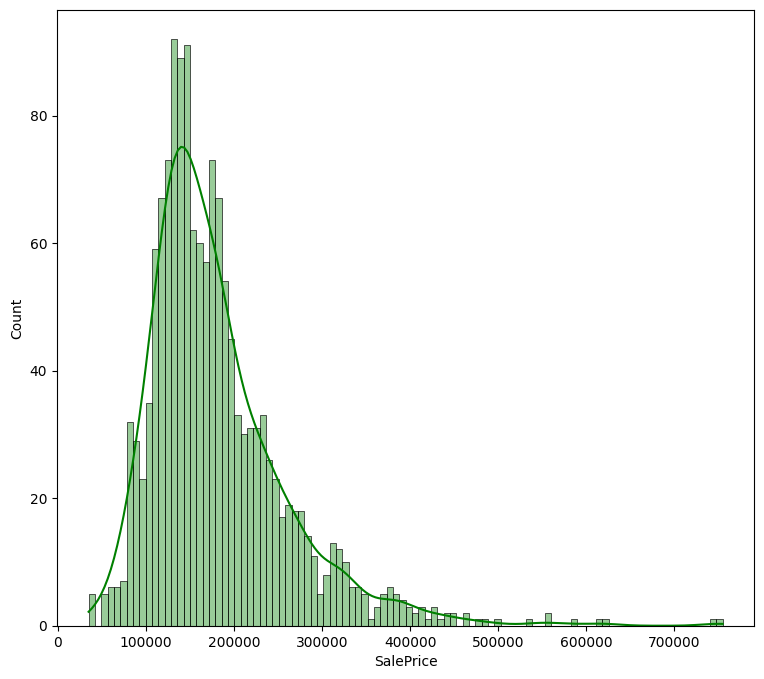

In [575]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.histplot(df['SalePrice'], color='g', bins=100, kde=True, alpha=0.4)

### Scatter Plots Analysis

Scatter plots are a useful visualization tool to understand the relationship between two numerical variables. In this notebook, I have created scatter plots to analyze the relationship between different features and the target variable `SalePrice`.

By examining these scatter plots of features with numeric types against the price, we can identify patterns, trends, and potential outliers in the data. This visual analysis is crucial for feature selection and understanding the underlying relationships in the dataset.

In [576]:
set_of_outliers = set()

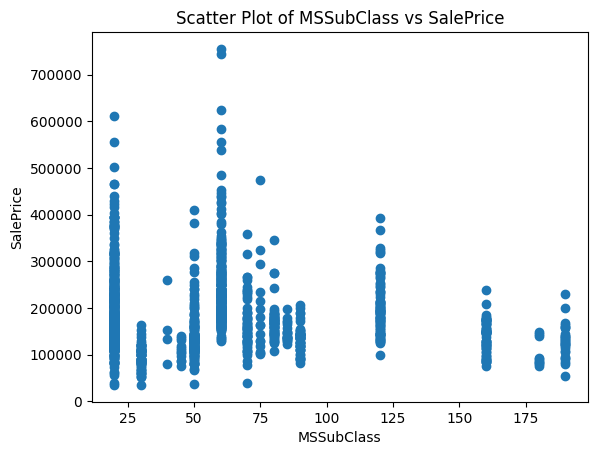

In [577]:
plt.scatter(x='MSSubClass', y='SalePrice', data=df)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of MSSubClass vs SalePrice')
plt.show()

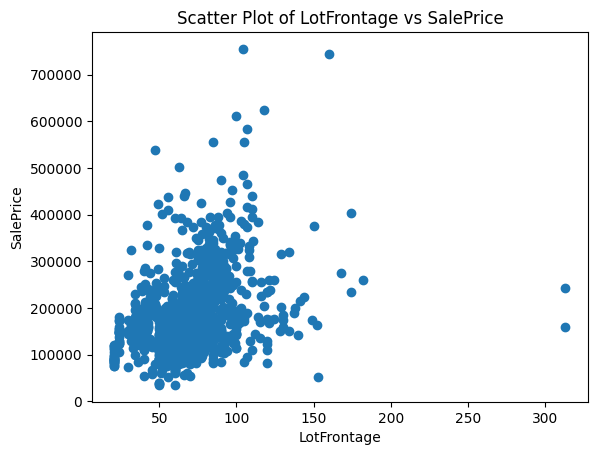

In [578]:
plt.scatter(x='LotFrontage', y='SalePrice', data=df)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of LotFrontage vs SalePrice')
plt.show()

We have identified that LotFrontage values greater than 300 are outliers. Therefore, we will remove these rows from the dataset to ensure a more accurate analysis.

In [579]:
df.query('LotFrontage > 300')[['Id', 'OverallCond', 'SalePrice']]
#Drop 935, 1299
set_of_outliers.add(935)
set_of_outliers.add(1299)

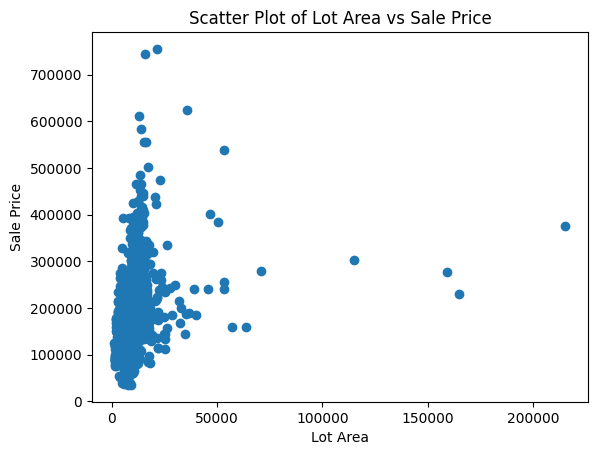

In [580]:
plt.scatter(x='LotArea', y='SalePrice', data=df)
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Lot Area vs Sale Price')
plt.show()

There are outliers usually above 60,000.

In [581]:
df.query('LotArea > 60000')[['Id', 'OverallCond', 'SalePrice']]
#250, 314, 336, 452, 707, 1299
set_of_outliers.add(250)
set_of_outliers.add(314)
set_of_outliers.add(336)
set_of_outliers.add(452)
set_of_outliers.add(707)
set_of_outliers.add(1299)

In [582]:
pd.Series(stats.zscore(df['LotArea'])).sort_values().tail(10)

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

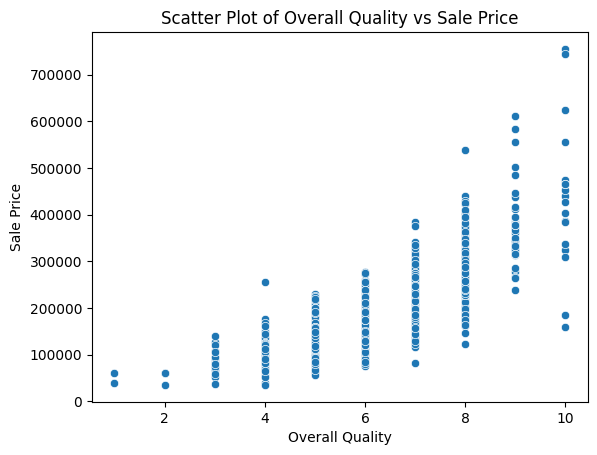

In [583]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Overall Quality vs Sale Price')
plt.show()

In [584]:
df.query('OverallQual == 10')[['Id', 'OverallCond', 'SalePrice']]

,Id,OverallCond,SalePrice
58,59,5,438780
185,186,9,475000
224,225,5,386250
389,390,5,426000
440,441,5,555000
515,516,5,402861
523,524,5,184750
583,584,9,325000
591,592,5,451950
691,692,6,755000


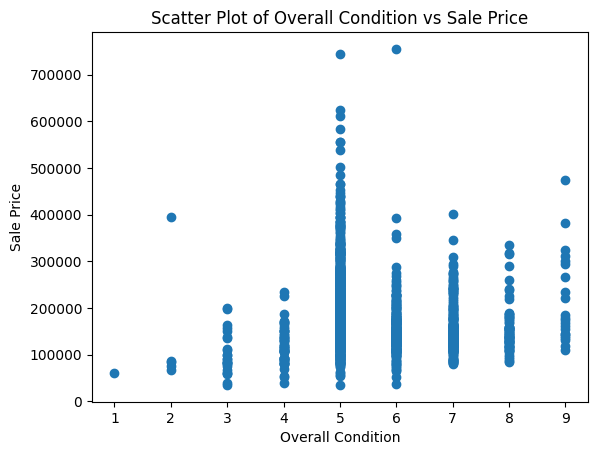

In [585]:
plt.scatter(x='OverallCond', y='SalePrice', data=df)
plt.xlabel("Overall Condition")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Overall Condition vs Sale Price")
plt.show()

In [586]:
df.query('OverallCond == 2')[['Id', 'OverallCond', 'SalePrice']]
#379
set_of_outliers.add(379)

In [587]:
df.query('OverallCond == 5 & SalePrice > 650000')[['Id', 'OverallCond', 'SalePrice']]
#1182
set_of_outliers.add(1182)


In [588]:
df.query('OverallCond == 6 & SalePrice > 650000')[['Id', 'OverallCond', 'SalePrice']]
#692
set_of_outliers.add(692)

Text(0.5, 1.0, 'Scatter Plot of Year Built vs Sale Price')

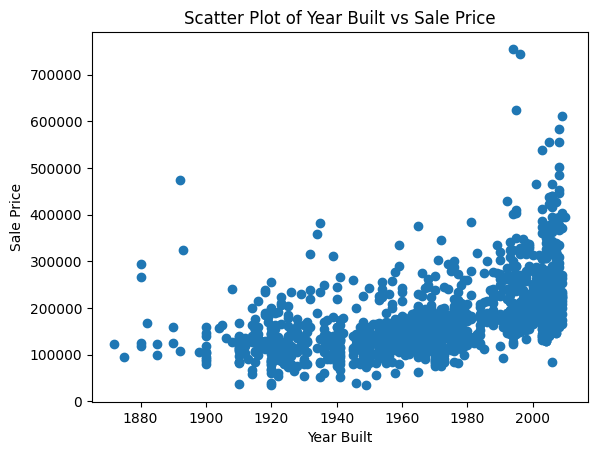

In [589]:
plt.scatter(x = 'YearBuilt', y = 'SalePrice', data  =df)
plt.xlabel("Year Built")
plt.ylabel('Sale Price')
plt.title('Scatter Plot of Year Built vs Sale Price')

In [590]:
df.query('YearBuilt < 1900 & SalePrice > 400000')[['Id', 'YearBuilt', 'SalePrice']]
#186
set_of_outliers.add(186)

Text(0.5, 1.0, 'Scatter Plot of Year Remodeled vs Sale Price')

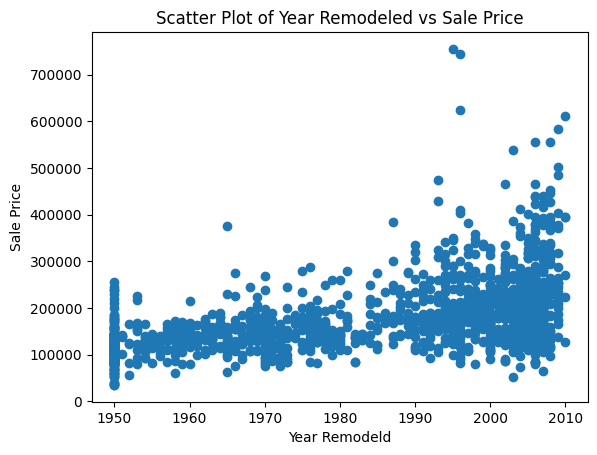

In [591]:
plt.scatter(x = 'YearRemodAdd', y = 'SalePrice', data = df)
plt.xlabel("Year Remodeld")
plt.ylabel('Sale Price')
plt.title("Scatter Plot of Year Remodeled vs Sale Price")

In [592]:
df.query('1992 < YearRemodAdd < 2000 & SalePrice > 600000')[['Id', 'YearRemodAdd', 'SalePrice']]
#1183, 692, 1170
set_of_outliers.add(1183)

In [593]:
df.query('YearRemodAdd < 1970 & SalePrice > 300000')[['Id', 'YearRemodAdd', 'SalePrice']]
#314
set_of_outliers.add(314)

Text(0.5, 1.0, 'Scatter Plot of Masonry Veneer Area vs Sale Price')

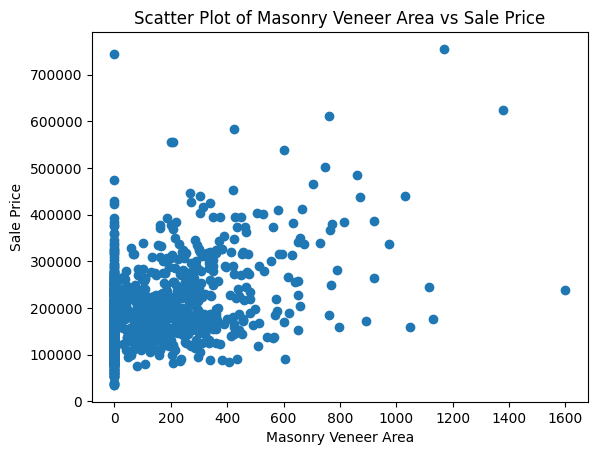

In [594]:
plt.scatter(x = 'MasVnrArea', y = 'SalePrice', data = df)
plt.xlabel("Masonry Veneer Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Masonry Veneer Area vs Sale Price")

In [595]:
df.query('MasVnrArea > 1500')[['Id', 'MasVnrArea', 'SalePrice']]
#298
set_of_outliers.add(298)

Text(0.5, 1.0, 'Scatter Plot of Basement Finished Area vs Sale Price')

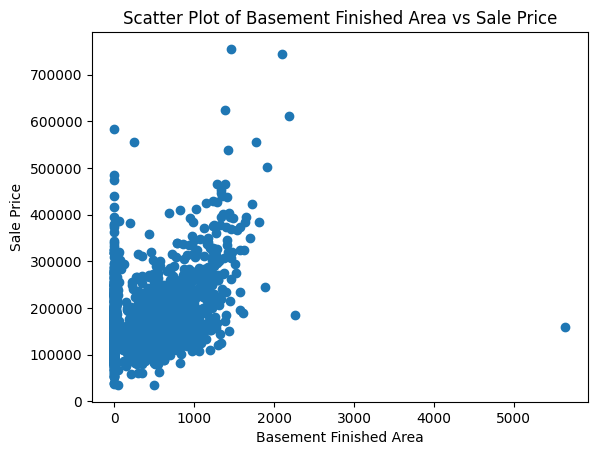

In [596]:
plt.scatter(x = 'BsmtFinSF1', y = 'SalePrice', data = df)
plt.xlabel("Basement Finished Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Finished Area vs Sale Price")

In [597]:
df.query('BsmtFinSF1 > 5000')[['Id', 'BsmtFinSF1', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of Basement Finished Area 2 vs Sale Price')

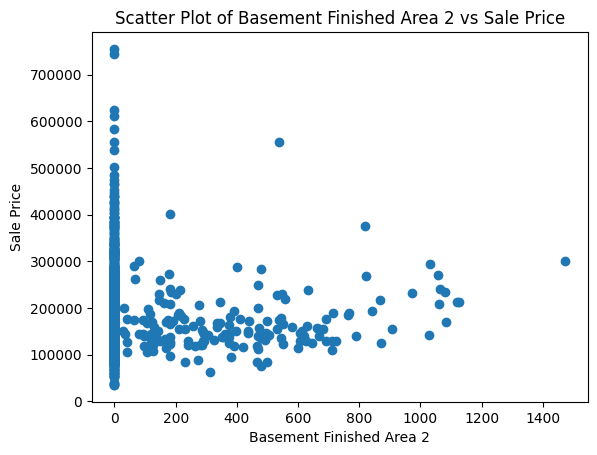

In [598]:
plt.scatter(x = 'BsmtFinSF2', y = 'SalePrice', data = df)
plt.xlabel("Basement Finished Area 2")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Finished Area 2 vs Sale Price")

In [599]:
df.query('BsmtFinSF2 > 400 & SalePrice > 500000')[['Id', 'BsmtFinSF2', 'SalePrice']]
#441
set_of_outliers.add(441)

Text(0.5, 1.0, 'Scatter Plot of Total Basement Area vs Sale Price')

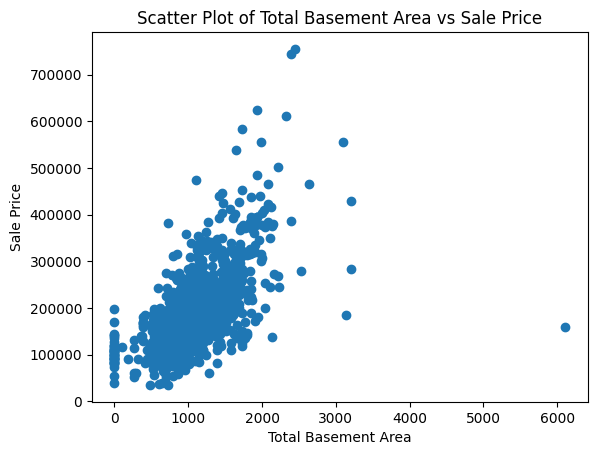

In [600]:
plt.scatter(x = 'TotalBsmtSF', y = 'SalePrice', data = df)
plt.xlabel("Total Basement Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Total Basement Area vs Sale Price")

In [601]:
df.query('TotalBsmtSF > 5000')[['Id', 'BsmtUnfSF', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of First Floor Area vs Sale Price')

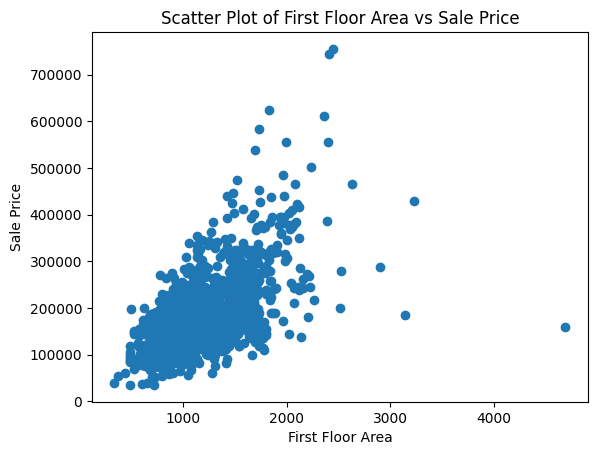

In [602]:
plt.scatter(x = '1stFlrSF', y = 'SalePrice', data = df)
plt.xlabel("First Floor Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of First Floor Area vs Sale Price")

In [603]:
df.query('`1stFlrSF` > 4000')[['Id', '1stFlrSF', 'SalePrice']]
#1299
set_of_outliers.add(1299)

Text(0.5, 1.0, 'Scatter Plot of Second Floor Area vs Sale Price')

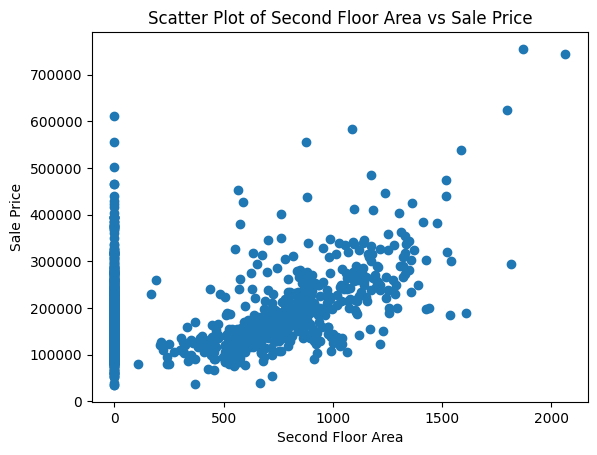

In [604]:
plt.scatter(x = '2ndFlrSF', y = 'SalePrice', data = df)
plt.xlabel("Second Floor Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Second Floor Area vs Sale Price")

In [605]:
df.query('`2ndFlrSF` > 1500')[['Id', '2ndFlrSF', 'SalePrice']]

,Id,2ndFlrSF,SalePrice
58,59,1519,438780
118,119,1523,320000
185,186,1518,475000
304,305,1818,295000
523,524,1538,184750
691,692,1872,755000
745,746,1540,299800
769,770,1589,538000
1169,1170,1796,625000
1182,1183,2065,745000


Text(0.5, 1.0, 'Scatter Plot of Low Quality Finished Area vs Sale Price')

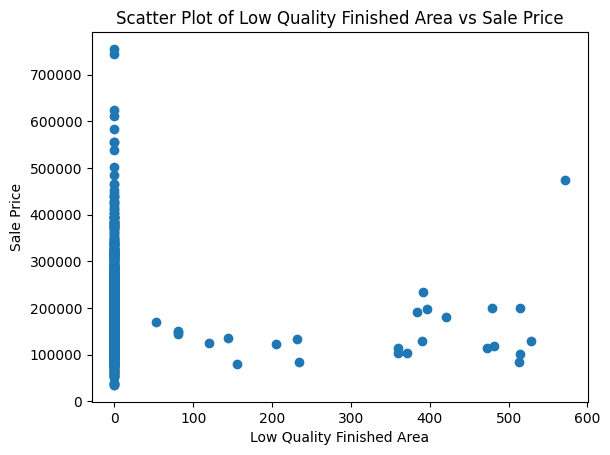

In [606]:
plt.scatter(x = 'LowQualFinSF', y = 'SalePrice', data = df)
plt.xlabel("Low Quality Finished Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Low Quality Finished Area vs Sale Price")

In [607]:
df.query('LowQualFinSF > 550')[['Id', 'LowQualFinSF', 'SalePrice']]
#186
set_of_outliers.add(186)

Text(0.5, 1.0, 'Scatter Plot of Ground Living Area vs Sale Price')

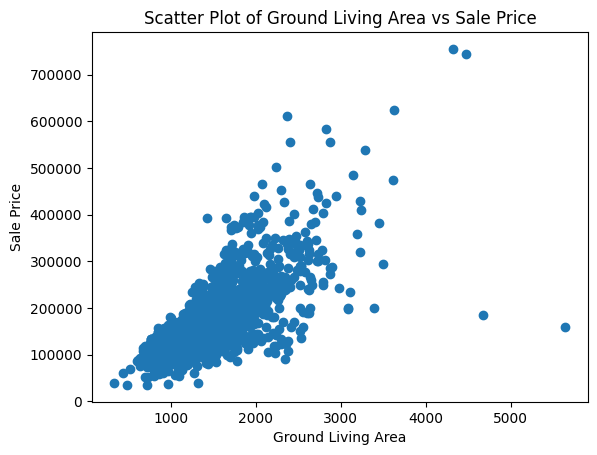

In [608]:
plt.scatter(x = 'GrLivArea', y = 'SalePrice', data = df)
plt.xlabel("Ground Living Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Ground Living Area vs Sale Price")

In [609]:
df.query('GrLivArea > 4500')[['Id', 'GrLivArea', 'SalePrice']]
#524, 1299

,Id,GrLivArea,SalePrice
523,524,4676,184750
1298,1299,5642,160000


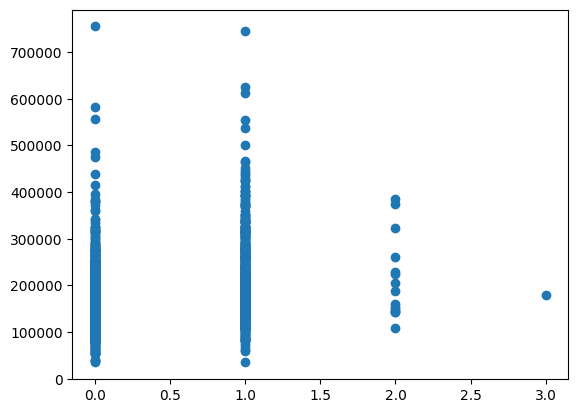

In [610]:
plt.scatter(x = 'BsmtFullBath', y ='SalePrice', data = df)

Text(0.5, 1.0, 'Scatter Plot of Basement Half Bath vs Sale Price')

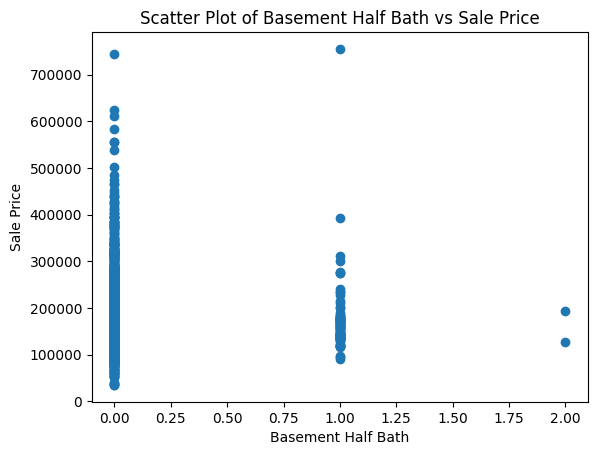

In [611]:
plt.scatter(x = 'BsmtHalfBath', y = 'SalePrice', data = df)
plt.xlabel("Basement Half Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Basement Half Bath vs Sale Price")

In [612]:
np.unique(stats.zscore(df['BsmtHalfBath']))

array([-0.24106104,  3.94880935,  8.13867973])

In [613]:
df.query('BsmtHalfBath > 1')[['Id', 'BsmtHalfBath', 'SalePrice']]
# 598 , 955
set_of_outliers.add(598)
set_of_outliers.add(955)

Text(0.5, 1.0, 'Scatter Plot of Full Bath vs Sale Price')

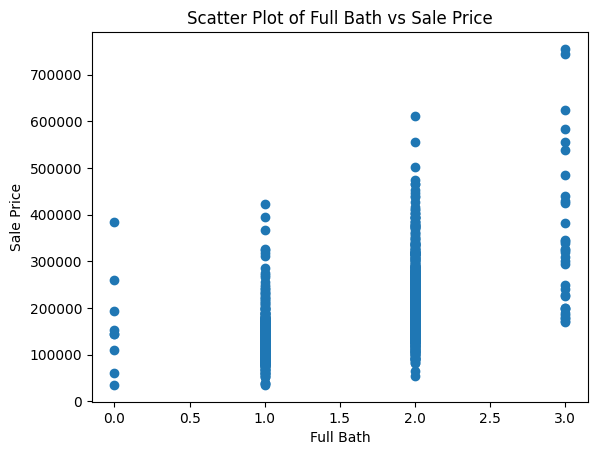

In [614]:
plt.scatter(x='FullBath', y='SalePrice', data=df)
plt.xlabel("Full Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Full Bath vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Half Bath vs Sale Price')

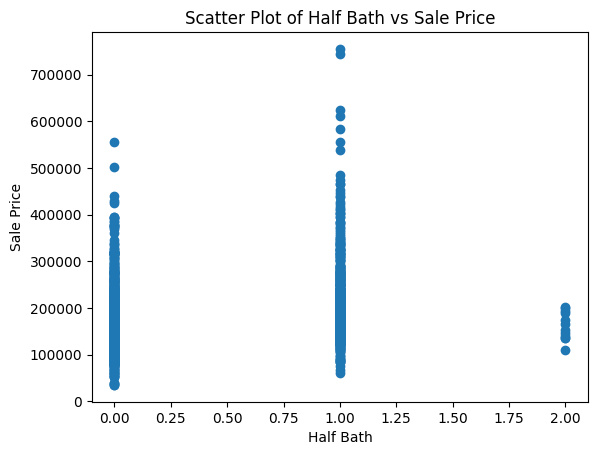

In [615]:
plt.scatter(x='HalfBath', y='SalePrice', data=df)
plt.xlabel("Half Bath")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Half Bath vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Bedroom Above Ground vs Sale Price')

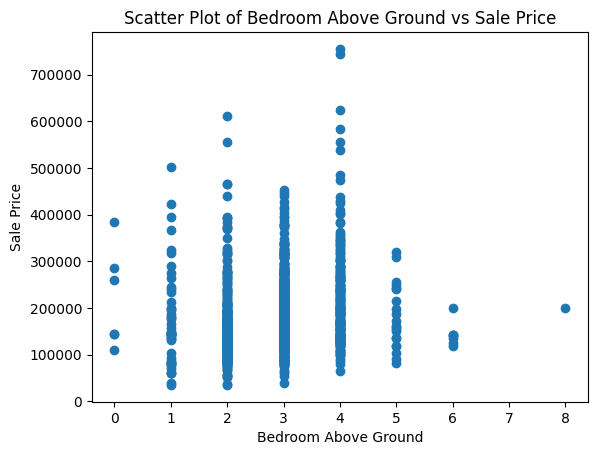

In [616]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data = df)
plt.xlabel("Bedroom Above Ground")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Bedroom Above Ground vs Sale Price")

In [617]:
df.query('BedroomAbvGr == 8')
#636
set_of_outliers.add(636)

Text(0.5, 1.0, 'Scatter Plot of Kitchen Above Ground vs Sale Price')

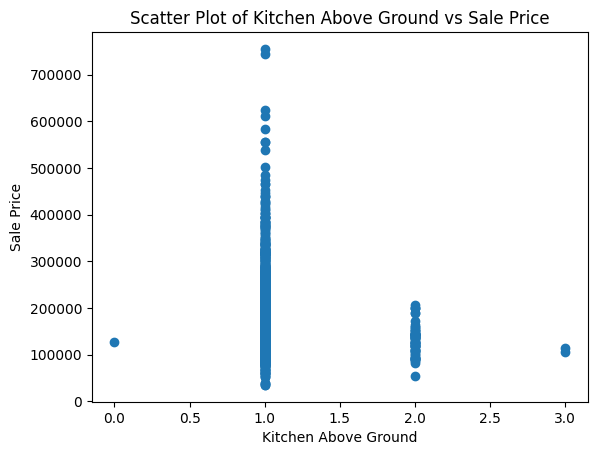

In [618]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=df)
plt.xlabel("Kitchen Above Ground")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Kitchen Above Ground vs Sale Price")

In [619]:
df.query('KitchenAbvGr == 3')
#49, 810

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
809,810,75,RM,90.0,8100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,11,2009,WD,Normal,106000


GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64

Text(0.5, 1.0, 'Scattber Plot of Total Rooms Above Ground vs Sale Price')

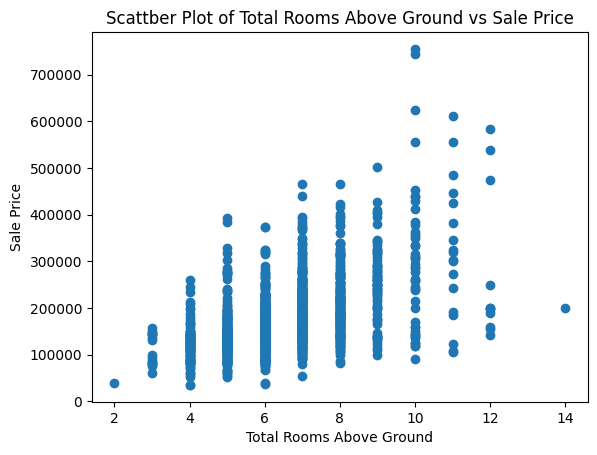

In [620]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=df)
plt.xlabel("Total Rooms Above Ground")
plt.ylabel("Sale Price")
plt.title("Scattber Plot of Total Rooms Above Ground vs Sale Price")

In [621]:
df.query('TotRmsAbvGrd == 14')
#636
set_of_outliers.add(636)

Text(0.5, 1.0, 'Scatter Plot of Fireplaces vs Sale Price')

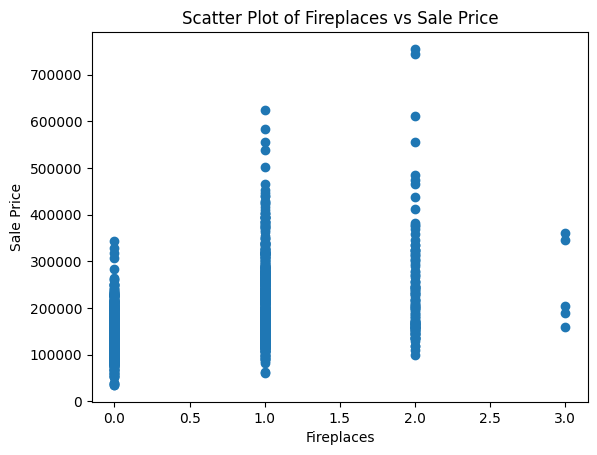

In [622]:
plt.scatter(x='Fireplaces', y='SalePrice', data= df)
plt.xlabel("Fireplaces")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Fireplaces vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Garage Cars vs Sale Price')

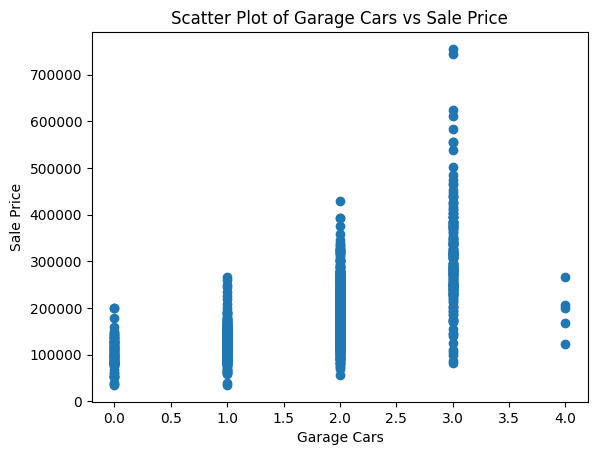

In [623]:
plt.scatter(x='GarageCars', y='SalePrice', data=df)
plt.xlabel("Garage Cars")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Garage Cars vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Garage Area vs Sale Price')

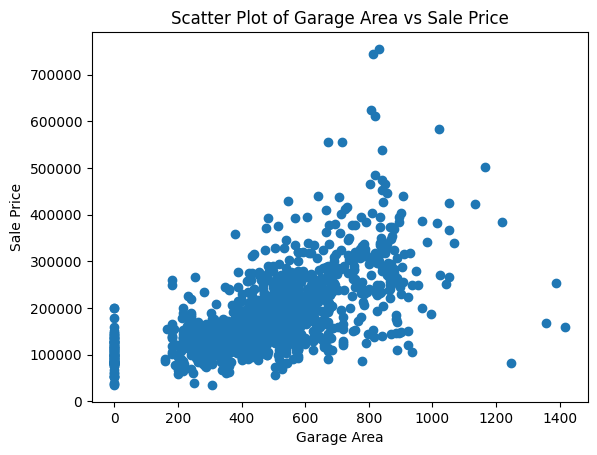

In [624]:
plt.scatter(x='GarageArea', y='SalePrice', data=df)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Garage Area vs Sale Price")


In [625]:
df.query('GarageArea > 1200')
#1062, 1191
set_of_outliers.add(1062)
set_of_outliers.add(1191)

Text(0.5, 1.0, 'Scatter Plot of Wood Deck Area vs Sale Price')

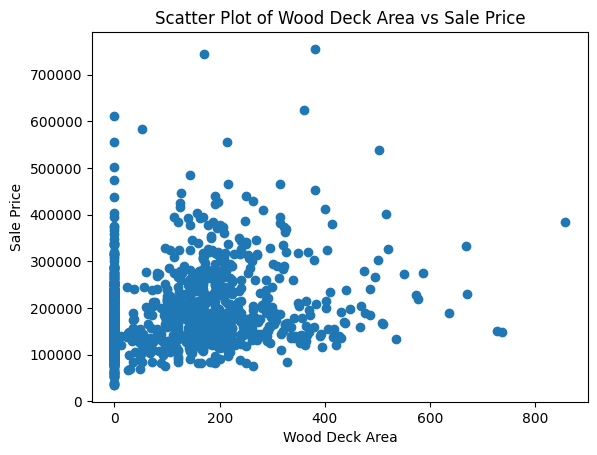

In [626]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=df)
plt.xlabel("Wood Deck Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Wood Deck Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Open Porch Area vs Sale Price')

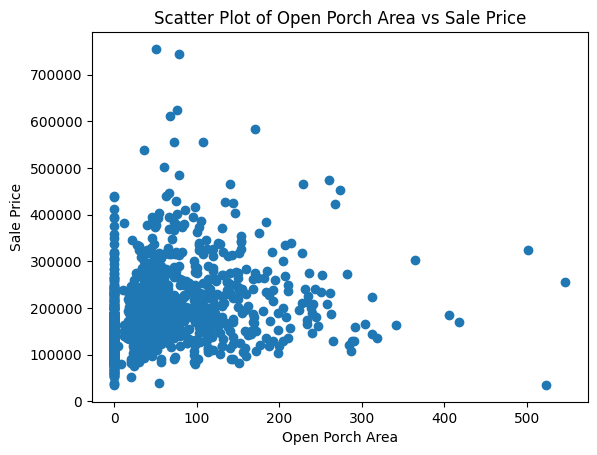

In [627]:
plt.scatter(x='OpenPorchSF', y='SalePrice', data=df)
plt.xlabel("Open Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Open Porch Area vs Sale Price")

In [628]:
df.query('OpenPorchSF > 500')
#496
set_of_outliers.add(496)

Text(0.5, 1.0, 'Scatter Plot of Enclosed Porch Area vs Sale Price')

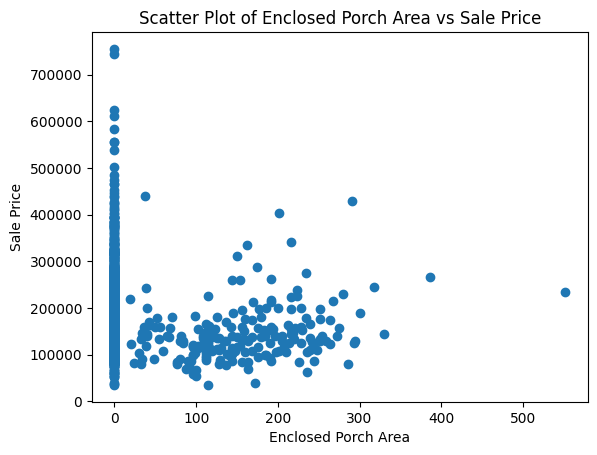

In [629]:
plt.scatter(x='EnclosedPorch', y='SalePrice', data=df)
plt.xlabel("Enclosed Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Enclosed Porch Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of 3 Season Porch Area vs Sale Price')

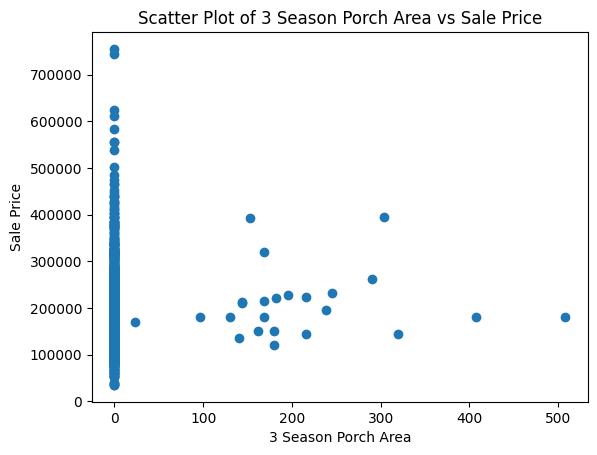

In [630]:
plt.scatter(x='3SsnPorch', y='SalePrice', data = df)
plt.xlabel("3 Season Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of 3 Season Porch Area vs Sale Price")

Text(0.5, 1.0, 'Scatter Plot of Screen Porch Area vs Sale Price')

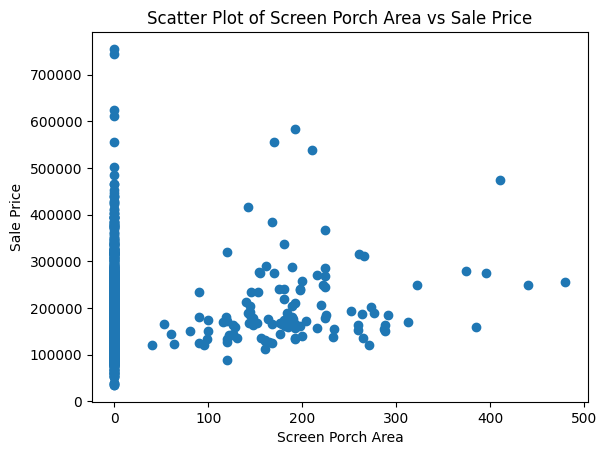

In [631]:
plt.scatter(x='ScreenPorch', y='SalePrice', data= df)
plt.xlabel("Screen Porch Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Screen Porch Area vs Sale Price")


Text(0.5, 1.0, 'Scatter Plot of Pool Area vs Sale Price')

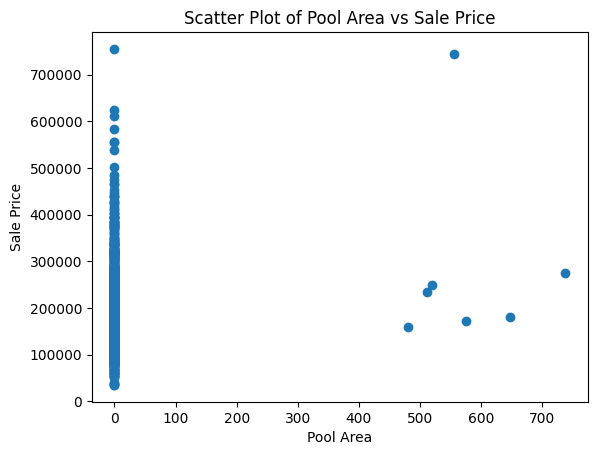

In [632]:
plt.scatter(x='PoolArea', y='SalePrice', data=df)
plt.xlabel("Pool Area")
plt.ylabel("Sale Price")
plt.title("Scatter Plot of Pool Area vs Sale Price")

Now we will remove all rows containing outliers.

Outliers are data points that differ significantly from other observations. They can occur due to variability in the data or errors in measurement. Removing outliers is important for several reasons:

1. **Improved Accuracy**: Outliers can skew the results of statistical analyses and machine learning models, leading to inaccurate conclusions. By removing them, we ensure that our models are trained on data that better represents the underlying patterns.

2. **Enhanced Performance**: Machine learning algorithms, especially those sensitive to distance metrics (like k-nearest neighbors or clustering algorithms), can be heavily influenced by outliers. Removing outliers can lead to better model performance and more reliable predictions.

3. **Better Visualization**: Outliers can distort visualizations, making it difficult to understand the true distribution and relationships within the data. Removing them helps in creating clearer and more interpretable plots.

4. **Data Integrity**: Outliers can sometimes indicate errors or anomalies in data collection. Removing these ensures that the dataset is clean and reliable.

However, it's important to carefully consider the context and the method used to identify outliers, as removing too many data points can also lead to loss of valuable information.

In [633]:
rows_to_drop = list(set_of_outliers)  # Convert the set to a list
df  = df.drop(rows_to_drop, axis=0)

In [634]:
df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

## Handling Missing Values with Intuition-Based Imputation

In this section, we will address missing values in the dataset by leveraging the detailed descriptions provided for each feature. By making reasonable assumptions and applying domain knowledge, we will ensure that the imputed values align with the context of the data, preserving its integrity for subsequent analysis and modeling.

Note: Detailed descriptions of the dataset can be found in `data_description.txt`.

### First we find the columns with missing values

In [635]:
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).head(30)

,0
PoolQC,1434
MiscFeature,1387
Alley,1353
Fence,1163
MasVnrType,863
FireplaceQu,681
LotFrontage,256
GarageYrBlt,78
GarageCond,78
GarageType,78


We will now fill in the NaN values with reasonable categories based on the detailed descriptions provided for each column in the data_description file.

In [636]:
df['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [637]:
df['PoolQC'] = df['PoolQC'].fillna('No')

In [638]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [639]:
df['Alley'] = df['Alley'].fillna('No')
test_df['Alley'] = test_df['Alley'].fillna('No')

In [640]:
df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [641]:
df['Fence'] = df['Fence'].fillna('No')
test_df['Fence'] = test_df['Fence'].fillna('No')

In [642]:
df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [643]:
df['MasVnrType'] = df['MasVnrType'].fillna('None')
test_df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [644]:
df['MasVnrArea'].unique()  

array([1.960e+02, 0.000e+00, 1.620e+02, 3.500e+02, 1.860e+02, 2.400e+02,
       2.860e+02, 3.060e+02, 2.120e+02, 1.800e+02, 3.800e+02, 2.810e+02,
       6.400e+02, 2.000e+02, 2.460e+02, 1.320e+02, 6.500e+02, 1.010e+02,
       4.120e+02, 2.720e+02, 4.560e+02, 1.031e+03, 1.780e+02, 5.730e+02,
       3.440e+02, 2.870e+02, 1.670e+02, 1.115e+03, 4.000e+01, 1.040e+02,
       5.760e+02, 4.430e+02, 4.680e+02, 6.600e+01, 2.200e+01, 2.840e+02,
       7.600e+01, 2.030e+02, 6.800e+01, 1.830e+02, 4.800e+01, 2.800e+01,
       3.360e+02, 6.000e+02, 7.680e+02, 4.800e+02, 2.200e+02, 1.840e+02,
       1.129e+03, 1.160e+02, 1.350e+02, 2.660e+02, 8.500e+01, 3.090e+02,
       1.360e+02, 2.880e+02, 7.000e+01, 3.200e+02, 5.000e+01, 1.200e+02,
       4.360e+02, 2.520e+02, 8.400e+01, 6.640e+02, 2.260e+02, 3.000e+02,
       6.530e+02, 1.120e+02, 4.910e+02, 2.680e+02, 7.480e+02, 9.800e+01,
       2.750e+02, 1.380e+02, 2.050e+02, 2.620e+02, 1.280e+02, 2.600e+02,
       1.530e+02, 6.400e+01, 3.120e+02, 1.600e+01, 

In [645]:
df['MasVnrArea'].isnull().sum()


8

In [646]:
df['MasVnrArea'].isnull().sum()

8

In [647]:
test_df['MasVnrArea'].isnull().sum()

15

In [648]:
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)


In [649]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [650]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('No')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('No')

In [651]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [652]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  39., 144., 114.,
       128., 149., 313.,  42., 168., 182., 138., 152., 124., 153.,  46.])

In [653]:
test_df['LotFrontage'].unique()

array([ 80.,  81.,  74.,  78.,  43.,  75.,  nan,  63.,  85.,  70.,  26.,
        21.,  24., 102.,  94.,  90.,  79., 110., 105.,  41., 100.,  67.,
        60.,  73.,  92.,  84.,  39.,  88.,  25.,  30.,  57.,  68.,  98.,
       120.,  87., 119.,  65.,  56.,  69.,  50.,  53.,  52.,  51.,  72.,
        86., 124.,  44.,  83.,  64.,  82.,  38.,  89.,  35.,  58.,  66.,
        93.,  31.,  76.,  28.,  61.,  95., 129.,  59.,  77.,  96.,  47.,
        34., 117.,  48.,  62.,  42., 106., 112.,  32., 115.,  71.,  45.,
       109., 113., 125., 101., 104., 108., 130., 135.,  36.,  55., 136.,
        97.,  91.,  37.,  22., 103.,  99.,  40., 123.,  54., 107., 150.,
       160., 195., 128.,  33., 118., 134., 155., 126.,  46., 149., 200.,
       121., 131., 114.,  49., 133., 140.])

In [654]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(0)

In [655]:
df['LotFrontage'].isnull().sum()

0

In [656]:
df['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,   0.,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  39., 144., 114.,
       128., 149., 313.,  42., 168., 182., 138., 152., 124., 153.,  46.])

In [657]:
test_df['LotFrontage'].isnull().sum()

0

In [658]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [659]:
df['GarageCond'] = df['GarageCond'].fillna('No')
test_df['GarageCond'] = test_df['GarageCond'].fillna('No')

In [660]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [661]:
df['GarageType'] = df['GarageType'].fillna('No')
test_df['GarageType'] = test_df['GarageType'].fillna('No')

In [662]:
df['GarageFinish'].unique()  

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [663]:
df['GarageFinish'] = df['GarageFinish'].fillna('No')  
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('No')

In [664]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [665]:
df['GarageQual'] = df['GarageQual'].fillna('No')
test_df['GarageQual'] = test_df['GarageQual'].fillna('No')

In [666]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [667]:
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('Unf')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('Unf')

In [668]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [669]:
df['BsmtExposure'] = df['BsmtExposure'].fillna('No/BSMT')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('No/BSMT')

In [670]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [671]:
df['BsmtQual'] = df['BsmtQual'].fillna('No/BSMT')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('No/BSMT')

In [672]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [673]:
df['BsmtCond'] = df['BsmtCond'].fillna('No/BMSMT')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('No/BSMT')

In [674]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [675]:
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No/BSMT')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('No/BSMT')

In [676]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [677]:
df['Electrical'] = df['Electrical'].fillna('SBrkr')
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr')

### Analysis of the Effect of Pool Quality on Sale Price

The box plot above visualizes the relationship between pool quality (`Ex`, `Fa`, `Gd`) and the `SalePrice`. 

#### Key Observations:
- Properties with excellent (`Ex`) pool quality show slightly higher sale prices compared to `Gd` and `Fa`. 
- However, pool quality is unlikely to be a major factor in a buyer’s decision since it can often be upgraded or fixed later.
- The variation in sale prices suggests that other features might have a stronger influence than pool quality.

### Conclusion:
Pool quality may not be a critical feature for predicting house prices, as it is not a deal-breaker for most buyers and has limited impact on the overall variation in sale price.


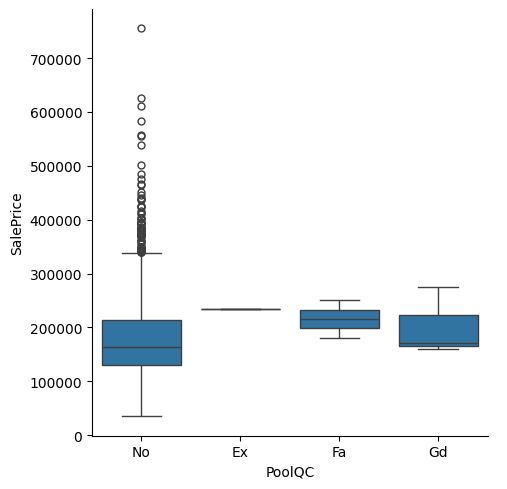

In [678]:
sns.catplot(x='PoolQC', y='SalePrice', data=df, kind='box')

### Analysis of the Effect of Miscellaneous Features on Sale Price

The box plot above visualizes the relationship between miscellaneous features (`Shed`, `Gar2`, `Othr`, and `TenC`) and the `SalePrice`. Since the `MiscFeature` column contains features that are often rare or unique, we assess whether these features significantly impact sale prices.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with sheds (`Shed`) exhibit a wide variation in sale prices, with a median price around $150,000. However, the presence of sheds does not strongly correlate with higher property values.
   - Garages (`Gar2`) have a slightly higher median sale price, but this feature is very rare, as reflected in the small sample size.
   - Properties with other miscellaneous features (`Othr`) tend to have lower median sale prices compared to the other categories.
   - Tennis courts (`TenC`) show the highest sale price in the dataset. However, this feature is extremely uncommon, making it less relevant for broader predictions.

2. **Outliers**:
   - Properties with sheds (`Shed`) show several high-value outliers above $250,000, indicating that some high-value homes may have sheds, though this is likely incidental.
   - The `TenC` category does not exhibit visible variation due to its extreme rarity in the dataset.

3. **Feature Impact**:
   - The rarity of features like `Gar2` and `TenC` limits their general applicability for predicting sale prices.
   - The presence of sheds (`Shed`) does not appear to significantly affect sale prices, as sheds are not typically seen as a desirable or impactful feature for homebuyers.

4. **Conclusion**:
   - The `MiscFeature` feature has limited relevance for predicting sale prices. Its rarity and the lack of clear relationships between these features and sale prices make it a poor predictor of house prices.

### Recommendation:
Exclude the `MiscFeature` column from the predictive model. Its inclusion would add unnecessary complexity without contributing meaningful insights to the model.


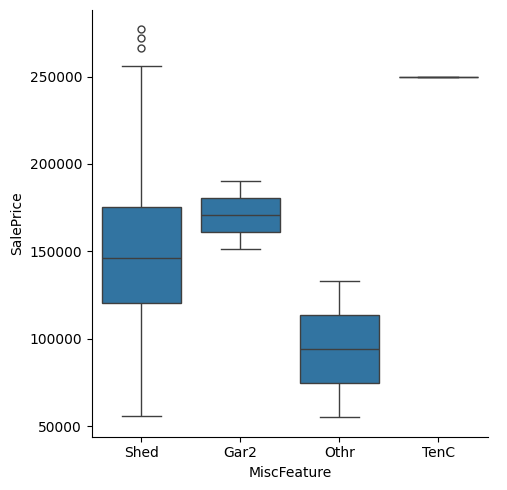

In [679]:
sns.catplot(x = 'MiscFeature', y = 'SalePrice', data = df, kind = 'box')

### Analysis of the Effect of Alley Access on Sale Price

The box plot above visualizes the relationship between the type of alley access (`No`, `Grvl`, and `Pave`) and the `SalePrice`. Since the `Alley` column contains `NaN` values, which likely indicate that the property does not have alley access. Instead of leaving these as missing values, we replace them with `'No'` to preserve the information that these properties lack an alley.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with no alley access (`No`) have a higher median sale price compared to those with gravel (`Grvl`) or paved (`Pave`) alley access.
   - The variation in sale price for `No` is significantly larger compared to `Grvl` and `Pave`, as seen in the wider interquartile range (IQR).
   - The median sale prices for properties with gravel and paved alley access are quite similar, with minimal distinction.

2. **Outliers**:
   - For `No` alley access, there are many high-value outliers (above $400,000), indicating that some high-priced properties exist without alley access.
   - `Grvl` and `Pave` have fewer and lower outliers compared to `No`.

3. **Feature Impact**:
   - The type of alley access appears to have **minimal influence** on predicting the sale price. The differences between the categories (`Grvl` and `Pave`) are minor and might not provide substantial predictive power.
   - The presence of `No` alley access correlates slightly with higher prices, but this could be an indirect result of other factors (e.g., property location, neighborhood quality) rather than alley access itself.

4. **Conclusion**:
   - Based on the minimal variance in sale prices across `Grvl` and `Pave` and the small impact of `No` on higher prices, **alley access may not be a significant feature** for predicting house prices. Including it in the model might introduce noise rather than valuable information.

### Recommendation:
It might be better to exclude this feature (`Alley`) from the predictive model, especially if the goal is to reduce model complexity without sacrificing accuracy.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\2780984401.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Alley', y='SalePrice', kind='box',  palette='Set1')


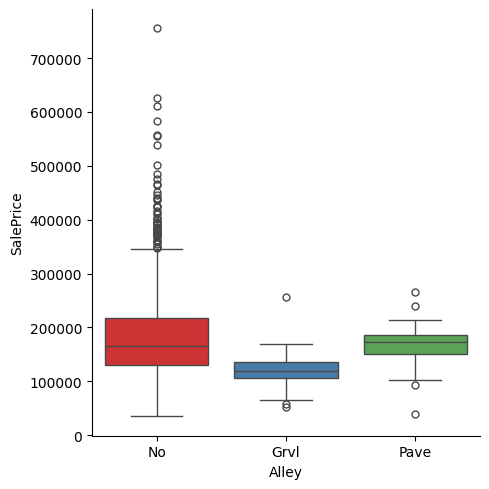

In [680]:
sns.catplot(data=df, x='Alley', y='SalePrice', kind='box',  palette='Set1')

In [681]:
df.query('Alley == "Grvl"').count()

Id               47
MSSubClass       47
MSZoning         47
LotFrontage      47
LotArea          47
                 ..
MoSold           47
YrSold           47
SaleType         47
SaleCondition    47
SalePrice        47
Length: 81, dtype: int64

### Analysis of the Effect of Fence Quality on Sale Price

The box plot above visualizes the relationship between the quality of fencing (`No`, `MnPrv`, `GdWo`, `GdPrv`, and `MnWw`) and the `SalePrice`. Since the `Fence` column contains `NaN` values, which likely indicate that the property does not have a fence, we replace them with `'No'` to retain the information about properties lacking fencing.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with no fencing (`No`) exhibit the highest variation in sale prices, as shown by the larger interquartile range (IQR) and the presence of high-value outliers.
   - Properties with fencing (`MnPrv`, `GdWo`, `GdPrv`, `MnWw`) have narrower IQRs, indicating less variation in sale prices for these categories.
   - The median sale prices for properties with fencing do not show significant differences across the various fence quality categories.

2. **Outliers**:
   - Properties without fences (`No`) show the highest number of high-value outliers, with sale prices exceeding $400,000.
   - Properties with fences have fewer outliers and generally lower maximum sale prices compared to those without fencing.

3. **Feature Impact**:
   - Fence quality appears to have **minimal impact** on sale price. The small differences in median sale prices across categories suggest that fence quality is not a critical determinant of property value.
   - This indicates that the presence or absence of fencing may not provide substantial predictive power for house prices.

4. **Conclusion**:
   - The `Fence` feature does not significantly impact sale prices and will not be used in the predictive model.
   - However, further analysis could explore potential interactions with other features (e.g., neighborhood or lot size) before making a final decision to exclude this feature.

### Recommendation:
Consider excluding the `Fence` feature from the model to simplify analysis unless further exploration uncovers meaningful interactions with other variables.



C:\Users\danie\AppData\Local\Temp\ipykernel_48360\2036942819.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='Fence', y='SalePrice', kind='box', palette='Set1')


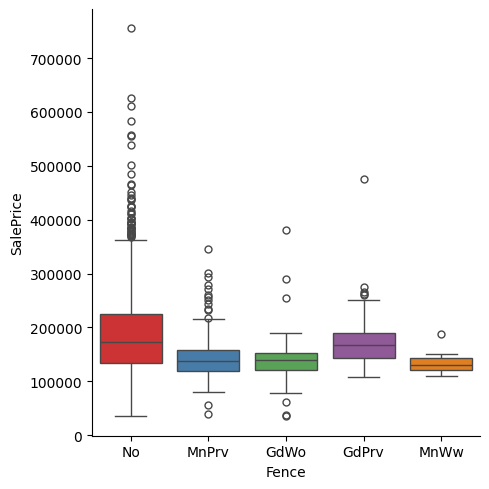

In [682]:
sns.catplot(data=df, x='Fence', y='SalePrice', kind='box', palette='Set1')

### Analysis of the Effect of Masonry Veneer Type on Sale Price

The box plot above visualizes the relationship between the type of masonry veneer (`MasVnrType`) and the `SalePrice`. Missing values in the `MasVnrType` column were replaced with `'None'` to indicate properties that do not have masonry veneer.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with `Stone` veneer exhibit the highest median sale price and the widest interquartile range (IQR), indicating that this veneer type is associated with higher-priced homes.
   - `BrkFace` veneer has a lower median sale price compared to `Stone` but still shows a relatively wide IQR.
   - Properties with no veneer (`None`) or with `BrkCmn` have the lowest median sale prices, suggesting that the type and presence of masonry veneer significantly influence house prices.

2. **Outliers**:
   - The `Stone` and `BrkFace` categories display numerous high-value outliers, reflecting their prevalence in higher-priced properties.
   - The `None` and `BrkCmn` categories have fewer high-value outliers and generally lower sale prices.

3. **Feature Impact**:
   - The distinct differences in median sale prices and IQRs across masonry veneer types indicate that `MasVnrType` is a **significant predictor** of sale price.
   - The strong variation in sale prices based on veneer type demonstrates that this feature captures meaningful information about property value.

### Conclusion:
The `MasVnrType` feature will be kept in the predictive model as it provides critical insights into how the type of masonry veneer impacts house prices.




C:\Users\danie\AppData\Local\Temp\ipykernel_48360\3229532039.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'MasVnrType', y= 'SalePrice' , kind = 'box' , palette='Set1')


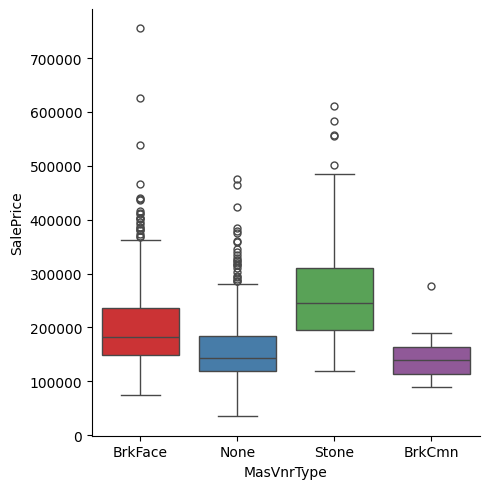

In [683]:
sns.catplot(data = df , x = 'MasVnrType', y= 'SalePrice' , kind = 'box' , palette='Set1')

### Analysis of the Effect of Fireplace Quality on Sale Price

The box plot above visualizes the relationship between the quality of fireplaces (`FireplaceQu`) and the `SalePrice`. Missing values (`NaN`) in the `FireplaceQu` column were replaced with `'No'` to indicate properties without a fireplace.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with no fireplace (`No`) have the lowest median sale price among all categories.
   - The median sale price increases with better fireplace quality, peaking for `Ex` (Excellent) quality fireplaces.
   - Higher-quality fireplaces (`Gd`, `Ex`) show a wider interquartile range (IQR), reflecting a broader range of sale prices.

2. **Outliers**:
   - All categories exhibit outliers, with higher-quality fireplaces (`Ex`, `Gd`) associated with high-value properties exceeding $400,000.
   - Lower-quality categories like `Po` (Poor) and `Fa` (Fair) have fewer and lower-value outliers.

3. **Feature Impact**:
   - Fireplace quality has a **significant impact** on sale prices. The steady increase in median sale price from lower-quality to higher-quality fireplaces (`Po` to `Ex`) indicates a strong positive correlation with house value.
   - The observed variation within categories supports the importance of `FireplaceQu` in capturing diverse pricing patterns.

### Conclusion:
`FireplaceQu` will be used in predicting house prices, as it demonstrates a clear relationship with sale prices. Including this feature in the predictive model will likely enhance its accuracy by accounting for the contribution of fireplace quality to property value.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\2930997587.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data =df , x = 'FireplaceQu', y= 'SalePrice', kind =  'box', palette = 'Set1')


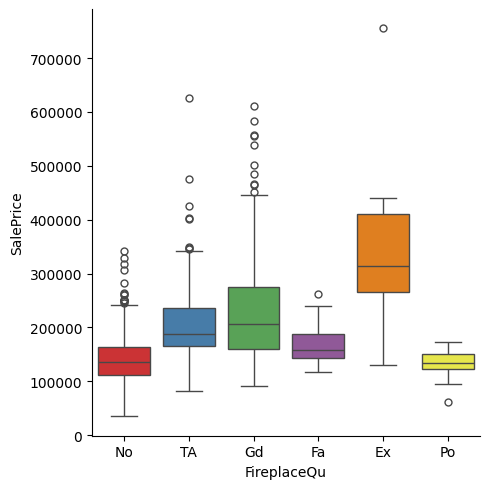

In [684]:
sns.catplot(data =df , x = 'FireplaceQu', y= 'SalePrice', kind =  'box', palette = 'Set1')

##
Something to note that houses not always had garages as it wasnt always the standard so we will use a correlation matrix to see if houses with garages 

In [685]:
df['GarageYrBlt'].corr(df['YearBuilt'])

0.8248629684531709

### Analysis of the Effect of Garage Condition on Sale Price

The box plot above visualizes the relationship between the condition of the garage (`TA`, `Fa`, `No`, `Gd`, `Po`, and `Ex`) and the `SalePrice`. Since the `GarageCond` column contains `NaN` values, which likely indicate that the property does not have a garage, we replace them with `'No'` to retain the information that these properties lack a garage.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with a typical garage condition (`TA`) have the highest median sale price compared to other garage conditions.
   - Properties with no garage (`No`) or garages in fair (`Fa`) or poor (`Po`) condition show slightly lower median sale prices.
   - Excellent (`Ex`) and good (`Gd`) garage conditions exhibit higher median sale prices, though these categories have fewer data points.

2. **Outliers**:
   - Properties with a typical garage condition (`TA`) exhibit numerous high-value outliers (sale prices exceeding $400,000), indicating that these are associated with higher-value homes.
   - Other categories, such as `Fa`, `No`, `Po`, and `Gd`, have fewer or less pronounced outliers, showing less variation in high sale prices.

3. **Feature Impact**:
   - The condition of the garage has **minimal impact** on sale prices. Properties with better garage conditions (e.g., `TA`, `Gd`, and `Ex`) show slightly higher prices compared to those with poorer conditions (`Fa`, `Po`, or `No`), but the differences are not substantial.
   - This suggests that garage condition serves as a weak indicator of property quality and value.

4. **Conclusion**:
   - The `GarageCond` feature provides limited information about the quality of a property and its relationship to sale price. It will excluded from the predictive model to simplify analysis without sacrificing accuracy.



C:\Users\danie\AppData\Local\Temp\ipykernel_48360\1719650964.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data =df , x = 'GarageCond',  y = 'SalePrice', kind = 'box', palette = 'Set1')


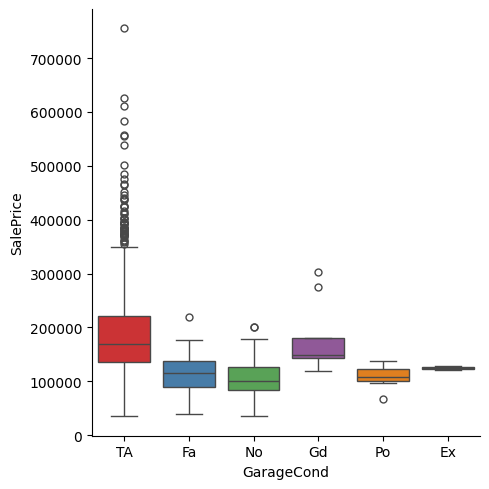

In [686]:
sns.catplot(data =df , x = 'GarageCond',  y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Garage Type on Sale Price

The box plot above visualizes the relationship between the type of garage (`Attchd`, `Detchd`, `BuiltIn`, `CarPort`, `No`, `Basment`, and `2Types`) and the `SalePrice`. Since the `GarageType` column contains `NaN` values, which likely indicate that the property does not have a garage, we replace them with `'No'` to retain this information.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with built-in garages (`BuiltIn`) have the highest median sale price and also the widest interquartile range (IQR), suggesting significant variation in sale prices for this garage type. This may indicate that built-in garages are more common in higher-value homes.
   - Properties with attached garages (`Attchd`) have the second-highest median sale price and a narrower IQR compared to built-in garages.
   - Detached garages (`Detchd`) show a lower median sale price compared to attached and built-in garages, with a moderate IQR.
   - Properties with no garage (`No`), carports (`CarPort`), and basement garages (`Basment`) exhibit the lowest median sale prices and limited variation, as reflected in their narrower IQRs.
   - Properties with two types of garages (`2Types`) have a higher median sale price but contain fewer data points, leading to limited conclusions.

2. **Outliers**:
   - Built-in garages (`BuiltIn`) and attached garages (`Attchd`) exhibit numerous high-value outliers, indicating that these garage types are often present in high-value properties.
   - Detached garages (`Detchd`) and properties with no garage (`No`) show fewer high-value outliers, aligning with their generally lower median sale prices.

3. **Feature Impact**:
   - The type of garage shows **notable variation** in sale prices, with built-in and attached garages being more commonly associated with higher-value properties.
   - This feature captures meaningful information about the property type and value, suggesting that garage type is a significant determinant of sale price.

4. **Conclusion**:
   - The `GarageType` feature will be kept in the predictive model. The variation in sale prices based on garage type provides valuable insights, making it a potentially strong predictor of house prices.




C:\Users\danie\AppData\Local\Temp\ipykernel_48360\2742870397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data =  df , x = 'GarageType' , y  = 'SalePrice' , kind = 'box', palette= 'Set1')


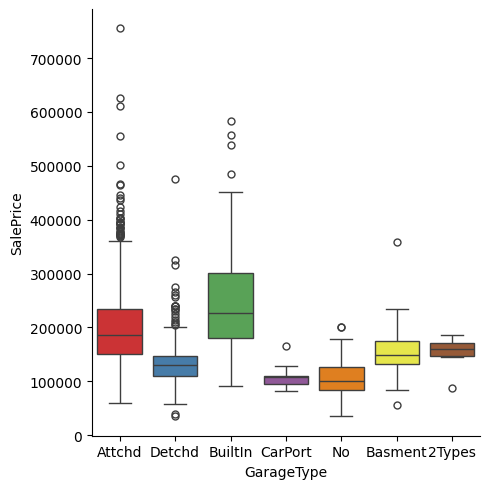

In [687]:
sns.catplot(data =  df , x = 'GarageType' , y  = 'SalePrice' , kind = 'box', palette= 'Set1')

### Analysis of the Effect of Garage Finish on Sale Price

The box plot above visualizes the relationship between the type of garage finish (`Fin`, `RFn`, `Unf`, and `No`) and the `SalePrice`. Since the `GarageFinish` column contains `NaN` values, which likely indicate that the property does not have a garage, we replace them with `'No'` to retain this information.

Here are the key observations:

1. **Distribution of Sale Prices**:
   - Properties with a finished garage (`Fin`) exhibit the highest median sale price and the largest interquartile range (IQR), indicating significant variation in sale prices for homes with this type of garage finish.
   - Garages with a rough finish (`RFn`) have the second-highest median sale price and a moderately wide IQR, reflecting a noticeable difference from unfinished garages.
   - Properties with unfinished garages (`Unf`) show a lower median sale price and a narrower IQR compared to finished and rough-finished garages.
   - Properties with no garage (`No`) have the lowest median sale price and the narrowest IQR, indicating limited variation.

2. **Outliers**:
   - Finished garages (`Fin`) and rough-finished garages (`RFn`) exhibit several high-value outliers, indicating their association with higher-value properties.
   - Unfinished garages and properties with no garage have fewer or lower-value outliers.

3. **Feature Impact**:
   - The type of garage finish shows a **clear impact** on sale prices. Properties with finished and rough-finished garages command higher prices compared to those with unfinished garages or no garages.
   - This variation suggests that garage finish is a meaningful indicator of property value.

4. **Conclusion**:
   - The `GarageFinish` feature will be kept in  the predictive model. The distinct differences in median sale prices and IQRs across the categories demonstrate its significance as a predictor of house prices.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\2996468448.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'GarageFinish', y = 'SalePrice', kind = 'box', palette = 'Set1')


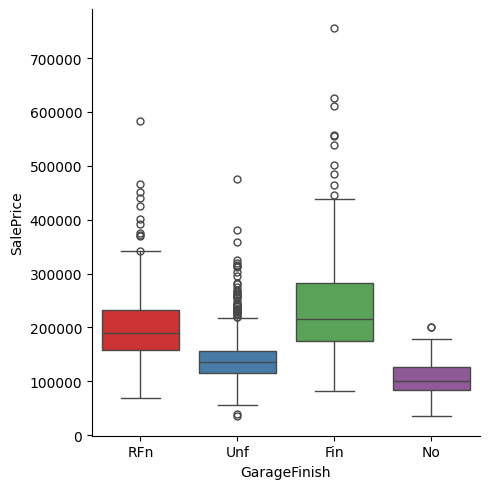

In [688]:
sns.catplot(data = df , x = 'GarageFinish', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Garage Quality on Sale Price

The box plot above visualizes the relationship between the quality of garages (`GarageQual`) and the `SalePrice`. Missing values in the `GarageQual` column, likely representing properties without a garage, were replaced with `'No'` to retain this information.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with garages of excellent quality (`Ex`) have the highest median sale price, indicating that better garage quality correlates with higher property value.
   - Typical garage quality (`TA`) is associated with the second-highest median sale price and exhibits the largest interquartile range (IQR), reflecting a wide variation in property values.
   - Lower-quality garages (`Fa`, `Po`) and properties without garages (`No`) show significantly lower median sale prices.

2. **Outliers**:
   - The `TA` category shows many high-value outliers, indicating that typical garages are associated with a diverse range of properties, including high-value homes.
   - The `Ex` category has fewer but higher outliers, which further supports the association of excellent-quality garages with premium properties.

3. **Feature Impact**:
   - The quality of garages demonstrates a **clear impact** on sale price. The significant differences in median sale prices and variations across categories suggest that `GarageQual` captures meaningful information about property value.

### Conclusion:
The `GarageQual` feature is a strong predictor of sale price and is going to be used in the predictive model. It provides valuable insights into the relationship between garage quality and property pricing.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\4162429918.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'GarageQual', y = 'SalePrice', kind = 'box', palette = 'Set1')


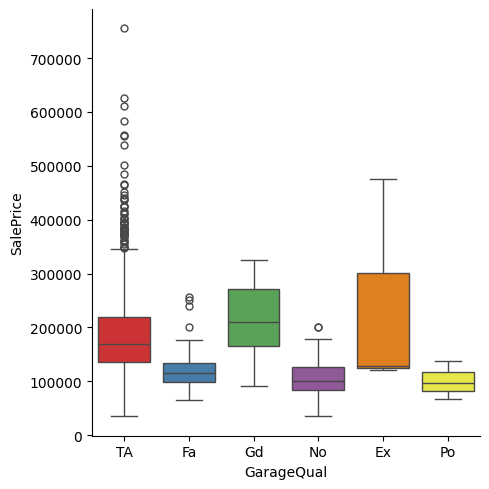

In [689]:
sns.catplot(data = df , x = 'GarageQual', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Basement Finish Type 2 on Sale Price

The box plot above visualizes the relationship between secondary basement finish types (`BsmtFinType2`) and the `SalePrice`. Missing values in the `BsmtFinType2` column, likely indicating properties without secondary basement finishes, were replaced with `'No'`.

### Key Observations:

1. **Distribution of Sale Prices**:
   - The median sale prices across all secondary basement finish types (`Unf`, `BLQ`, `ALQ`, `Rec`, `LwQ`, and `GLQ`) are **almost identical**, indicating no significant distinction in property pricing based on this feature.
   - The interquartile ranges (IQRs) for all categories are also similar, with no meaningful variation in the spread of sale prices.

2. **Outliers**:
   - Some categories, such as `Unf` and `ALQ`, exhibit outliers with high sale prices, but these outliers are not substantially different across the other categories.
   - The presence of outliers does not significantly impact the overall similarity in median and IQR values.

3. **Feature Impact**:
   - The lack of variation in median sale prices and similar IQRs across categories suggests that the `BsmtFinType2` feature has **minimal predictive power** for sale price.
   - Secondary basement finish types do not appear to be a key differentiator for property value in this dataset.

### Conclusion:
Due to the lack of meaningful variation in sale prices across categories, `BsmtFinType2` will be excluded from the predictive model. Its inclusion would not provide valuable insights and could unnecessarily increase model complexity.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\281737773.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'BsmtFinType2', y = 'SalePrice', kind = 'box', palette = 'Set1')


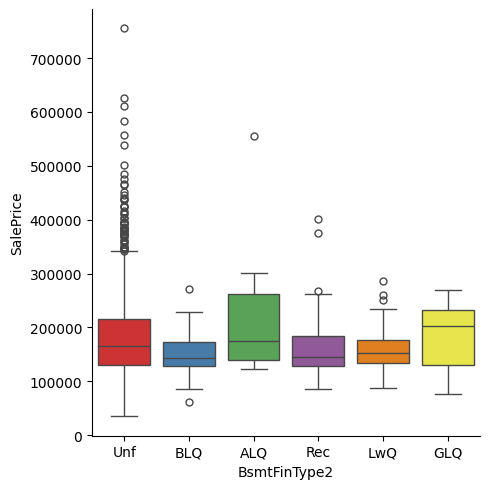

In [690]:
sns.catplot(data = df , x = 'BsmtFinType2', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Basement Exposure on Sale Price

The box plot above visualizes the relationship between basement exposure levels (`No`, `Gd`, `Mn`, `Av`, and `No/BSMT`) and the `SalePrice`. Missing values in the `BsmtExposure` column, likely indicating properties without a basement, were replaced with `'No/BSMT'` to preserve this information.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with `Gd` (Good Exposure) exhibit the highest median sale price and the widest interquartile range (IQR), indicating that this feature strongly correlates with higher-priced homes.
   - Moderate (`Mn`) and average (`Av`) exposure categories show relatively lower median sale prices than `Gd`, but still higher than properties with no exposure (`No`).
   - Properties with no basement (`No/BSMT`) exhibit the lowest median sale price and a narrow IQR, reflecting limited variation in sale prices.

2. **Outliers**:
   - The `Gd` category contains several high-value outliers, further demonstrating its association with higher-priced properties.
   - The `No`, `Mn`, and `Av` categories also show outliers, though they are generally clustered within lower sale price ranges.
   - The `No/BSMT` category shows few or no high-value outliers.

3. **Feature Impact**:
   - Basement exposure has a **clear impact** on sale prices, with properties having better exposure (`Gd`, `Mn`, `Av`) commanding higher sale prices compared to those with no exposure (`No`) or no basement (`No/BSMT`).
   - The noticeable differences in medians and ranges across categories highlight the importance of this feature in predicting property value.

### Conclusion:
The `BsmtExposure` feature will be kept in the predictive model, as it provides significant insights into property pricing based on basement exposure levels. Its inclusion will enhance the model’s ability to capture meaningful variations in sale prices.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\555967604.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'BsmtExposure', y = 'SalePrice', kind = 'box', palette = 'Set1')


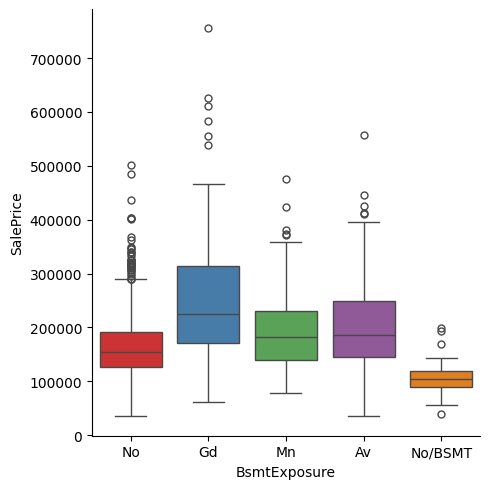

In [691]:
sns.catplot(data = df , x = 'BsmtExposure', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Basement Quality on Sale Price

The box plot above visualizes the relationship between basement quality (`Gd`, `TA`, `Ex`, `No/BSMT`, and `Fa`) and the `SalePrice`. Missing values in the `BsmtQual` column, which likely indicate properties without a basement, were replaced with `'No/BSMT'` to preserve this information.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with excellent (`Ex`) basement quality exhibit the highest median sale price and the widest interquartile range (IQR), showing a significant correlation with higher property values.
   - Properties with good (`Gd`) basement quality have the second-highest median sale price, followed by typical (`TA`) quality basements.
   - Properties with no basement (`No/BSMT`) and fair (`Fa`) basement quality have the lowest median sale prices, with narrower IQRs.

2. **Outliers**:
   - `Ex` and `Gd` categories display numerous high-value outliers, indicating that higher basement quality is common in more expensive homes.
   - The `No/BSMT` and `Fa` categories exhibit fewer high-value outliers, with sale prices concentrated in lower ranges.

3. **Feature Impact**:
   - The variation in median sale prices and IQRs across the categories demonstrates that basement quality has a **strong impact** on property value.
   - Higher basement quality (`Ex`, `Gd`, `TA`) correlates with increased sale prices, while lower quality or absence of a basement (`No/BSMT`, `Fa`) corresponds to lower prices.

### Conclusion:
The `BsmtQual` feature is a significant predictor of house prices and will be retained in the predictive model. Its inclusion enhances the model's ability to capture the relationship between basement quality and sale price.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\3906343768.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'BsmtQual', y = 'SalePrice', kind = 'box', palette = 'Set1')


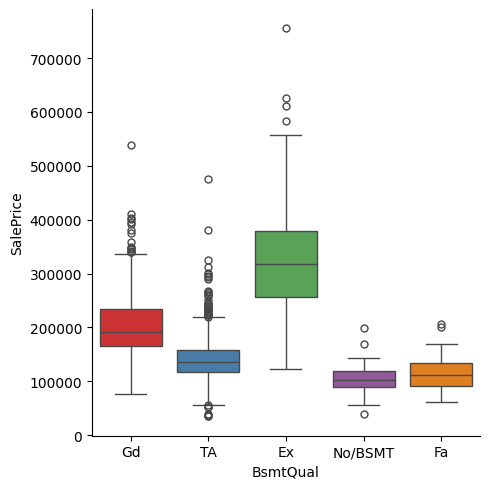

In [692]:
sns.catplot(data = df , x = 'BsmtQual', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Basement Condition on Sale Price

The box plot above visualizes the relationship between basement condition (`TA`, `Gd`, `No/BSMT`, `Fa`, and `Po`) and the `SalePrice`. Missing values in the `BsmtCond` column, which likely indicate properties without a basement, were replaced with `'No/BSMT'` to preserve this information.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with good (`Gd`) basement condition exhibit the highest median sale price and a moderately wide interquartile range (IQR), indicating that a good basement condition is associated with higher property values.
   - Properties with typical (`TA`) basement condition have the second-highest median sale price and a similar IQR, suggesting they are common across a broad range of home values.
   - Properties with no basement (`No/BSMT`) or fair (`Fa`) basement condition show lower median sale prices, with narrower IQRs, reflecting less variation in sale prices.
   - Poor (`Po`) basement condition exhibits the lowest median sale price and minimal variation, indicating limited desirability.

2. **Outliers**:
   - The `Gd` and `TA` categories show several high-value outliers, indicating that higher basement condition grades are associated with high-priced homes.
   - Categories like `Fa` and `Po` have few or no high-value outliers, aligning with their lower overall sale prices.

3. **Feature Impact**:
   - The differences in median sale prices and IQRs across basement condition categories demonstrate that basement condition has a **moderate impact** on sale prices.
   - While properties with better basement conditions (`Gd`, `TA`) tend to sell for higher prices, the impact is less pronounced compared to other features like basement quality.

### Conclusion:
The `BsmtCond` feature will be used in the predictive model as it provides moderate predictive value for sale price, particularly for distinguishing properties with good and typical basement conditions from those with no or poor conditions.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\3927610065.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'BsmtCond', y = 'SalePrice', kind = 'box', palette = 'Set1')


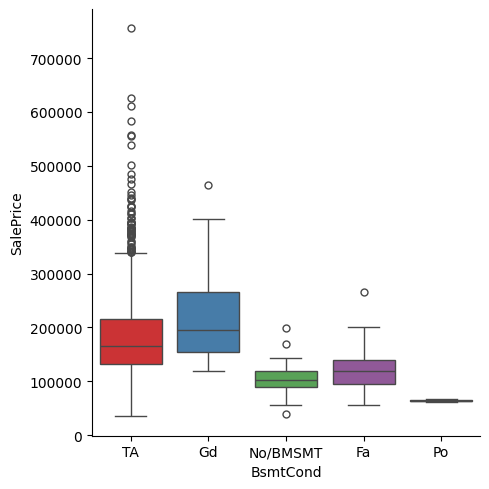

In [693]:
sns.catplot(data = df , x = 'BsmtCond', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Basement Finish Type 1 on Sale Price

The box plot above visualizes the relationship between the type of primary basement finish (`BsmtFinType1`) and the `SalePrice`. Missing values (`NaN`), likely indicating no basement, were replaced with `'No/BSMT'` to preserve information about properties without a basement.

#### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with `GLQ` finish exhibit the highest median sale price and the widest interquartile range (IQR), showing significant variation in sale prices.
   - `ALQ`and `Rec` finishes also have relatively higher median sale prices compared to other basement types, though not as pronounced as GLQ.
   - `Unf` and `BLQ` finishes show lower median sale prices, with minimal variation.
   - Properties with no basement (`No/BSMT`) and `LWQ` finishes have the lowest median sale prices.

2. **Outliers**:
   - **GLQ** and **ALQ** categories have several high-value outliers, indicating that these basement types are common in higher-priced homes.
   - **Unf**, **Rec**, and **BLQ** categories show fewer outliers, with sale prices clustered in a lower range.

3. **Feature Impact**:
   - The type of basement finish has a **strong impact** on sale price. GLQ finish, in particular, contributes to higher sale prices, making it an important feature to retain in the predictive model.
   - The variation in sale prices across basement types suggests that this feature captures valuable information about property value.

4. **Conclusion**:
   - The `BsmtFinType1` feature is a significant predictor of house price due to the distinct differences in sale price medians and ranges across basement finish types, especially for properties with GLQ basements.
   - This feature will be retained in the model as it adds critical information about property quality and potential value.

### Recommendation:
Keep the `BsmtFinType1` feature in the predictive model to leverage the clear correlation between basement finish type and sale price.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\4187966978.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'BsmtFinType1', y = 'SalePrice', kind = 'box', palette = 'Set1')


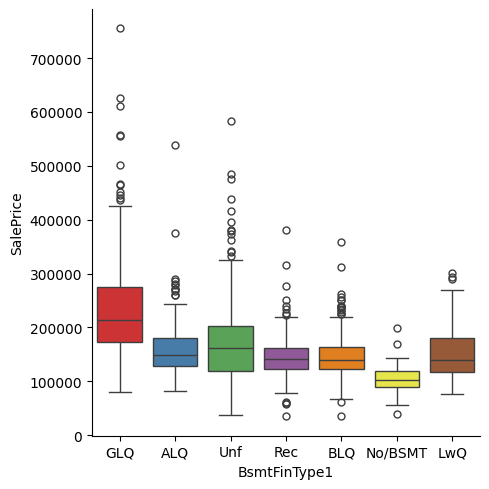

In [694]:
sns.catplot(data = df , x = 'BsmtFinType1', y = 'SalePrice', kind = 'box', palette = 'Set1')

### Analysis of the Effect of Electrical System on Sale Price

The box plot above visualizes the relationship between the type of electrical system (`SBrkr`, `FuseF`, `FuseA`, `FuseP`, and `Mix`) and the `SalePrice`. Missing values in the `Electrical` column were replaced with the most common category, `'SBrkr'`, to preserve the majority trend in the dataset.

### Key Observations:

1. **Distribution of Sale Prices**:
   - Properties with `SBrkr` (Standard Circuit Breaker) electrical systems exhibit the highest median sale price and the widest interquartile range (IQR), indicating that this type is associated with higher-value homes.
   - `FuseA` and `FuseF` systems have similar, slightly lower median sale prices and narrower IQRs, reflecting moderate property values.
   - `FuseP` and `Mix` systems show the lowest median sale prices, suggesting that these older or uncommon electrical systems are more prevalent in lower-value properties.

2. **Outliers**:
   - The `SBrkr` category has numerous high-value outliers, reinforcing its association with high-priced homes.
   - Other categories, such as `FuseA` and `FuseF`, exhibit fewer or less pronounced outliers, aligning with their lower sale prices.

3. **Feature Impact**:
   - The type of electrical system has a **moderate impact** on sale prices. Properties with `SBrkr` systems, the most common and modern electrical type, are consistently associated with higher prices, making this feature a potential indicator of property value.

### Conclusion:
The `Electrical` feature will be retained in the predictive model, as it provides meaningful insights into the relationship between electrical system type and sale price. Its inclusion helps capture variations in property quality associated with electrical systems.


C:\Users\danie\AppData\Local\Temp\ipykernel_48360\3149616231.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data = df , x = 'Electrical', y = 'SalePrice', kind = 'box', palette = 'Set1')


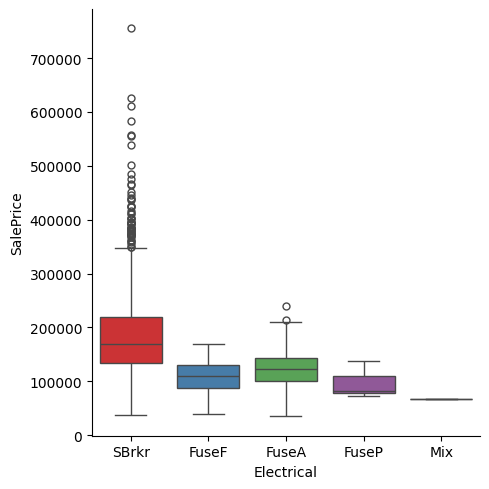

In [700]:
sns.catplot(data = df , x = 'Electrical', y = 'SalePrice', kind = 'box', palette = 'Set1')

## Dropping Features
Based on our analysis, we will remove the columns identified earlier from the dataset, as they provide limited value to the predictive model and may introduce unnecessary complexity without significantly improving accuracy


In [701]:
columns_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'GarageYrBlt', 'GarageCond', 'BsmtFinType2']

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns])